# Lab 1 | Cleaning numerical data

## 1) Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

## 2) Load data

In [2]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

## 3) First look

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
display(customer_df.shape)
customer_df.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

From previous work, I know that some of these columns can be translated into numerical columns, but I think that is not the point today.

## 4) Naming conventions
**Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)**

In [5]:
customer_df.columns = [colname.lower().replace(' ','_') for colname in customer_df.columns]
#Taken from FIFA lab
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## 5) Transforming dates
**Change `effective_to_date` column to datetime format.**

In [6]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)

`pd.to_datetime` can work with the date format already in the table, no other editing required.
Also, when using only one table, I prefer to use the dot notation, as in `customer_df.effective_to_date`.

## 6) Continous and discrete values
**Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df.**  
By definition, the categorical columns have discrete values, so the focus here are the numerical columns.

In [7]:
numerical = customer_df.select_dtypes(include = np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
categorical_df = customer_df.select_dtypes(include = 'object')
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
print(len(numerical.customer_lifetime_value.value_counts()))
print(len(numerical.income.value_counts()))
print(len(numerical.monthly_premium_auto.value_counts()))
print(len(numerical.months_since_last_claim.value_counts()))
print(len(numerical.months_since_policy_inception.value_counts()))
print(len(numerical.number_of_open_complaints.value_counts()))
print(len(numerical.number_of_policies.value_counts()))
print(len(numerical.total_claim_amount.value_counts()))

8041
5694
202
36
100
6
9
5106


In [10]:
len(numerical)

9134

In [11]:
def continous_or_discreet(table, frontier = 10):
    #Arguments:
        #table: the dataframe to separate. While the function will work with categorical data, numerical is expected
        #frontier: the division between the value counts to decide when a column is 'continous_or_discreet' using the operation table_size/frontier
    #Returns:
        #continous_df
        #discreet_df
    table_size = len(table)
    table_frontier = table_size/frontier
    continous_names = []
    discreet_names = []
    
    for col in table.columns:
        if len(table[col].value_counts()) > table_frontier:
            continous_names.append(col)
        else:
            discreet_names.append(col)
    
    continous_df = pd.DataFrame(table[continous_names])
    discreet_df = pd.DataFrame(table[discreet_names])
    
    return (continous_df,discreet_df)

In [12]:
(continous_df,discreet_df) = continous_or_discreet(numerical)

In [13]:
continous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [14]:
discreet_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


## 7) Correlations
**Plot a correlation matrix.**

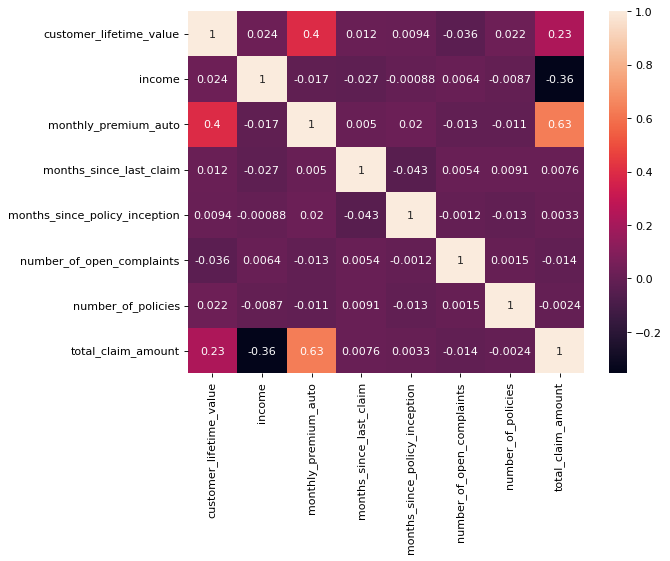

In [15]:
correlations_matrix = numerical.corr()

figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

There is no strong correlation between any columns, the higher being between `monthly_premium_auto` and `total_claim_amount` with 0.63

## 8) Plotting variables
Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

<AxesSubplot:>

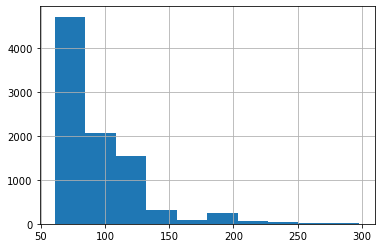

In [16]:
discreet_df['monthly_premium_auto'].hist()

In [17]:
def discreet_plot(table):
    for col in table.columns:
        sns.displot(x=col, data=table)
        plt.show()

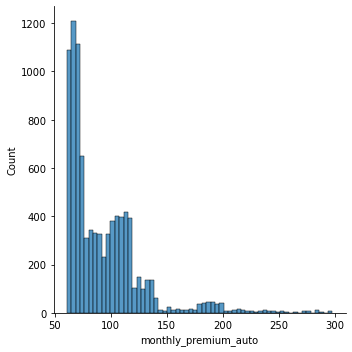

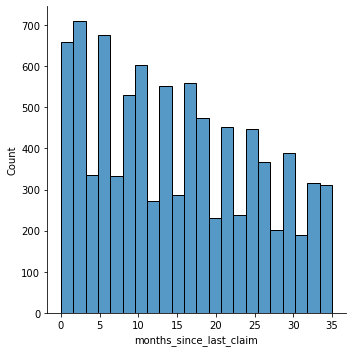

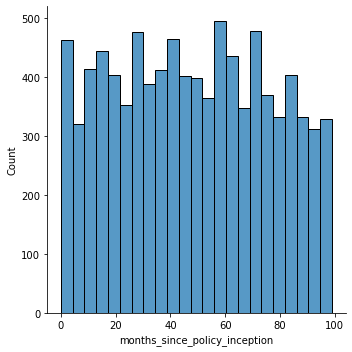

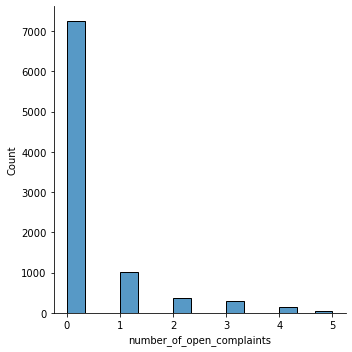

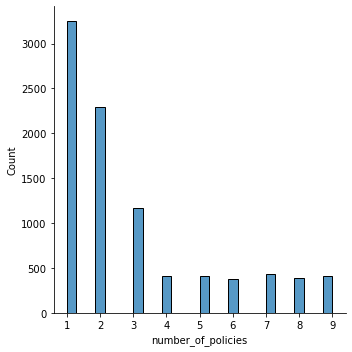

In [18]:
discreet_plot(discreet_df)

In [19]:
def continous_plot(table):
    for col in table.columns:
        ax = plt.subplots() 
#         ax = sns.displot(x=col, data=table, kind='kde', bw_adjust=.25)
        ax = sns.boxplot(x=col, data=table)
#         x.set(xlabel="x-axis", ylabel="y-axis")
        plt.show() 
#     I tried to plot two plots in the same figure, it is still not possible for me

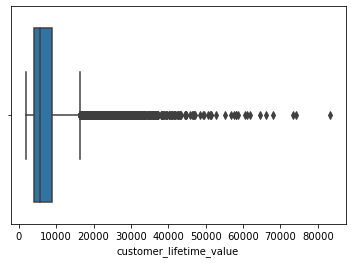

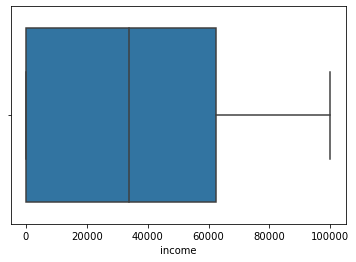

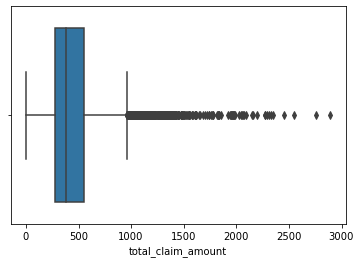

In [20]:
continous_plot(continous_df)


## 9) Analyzing plots
Comment what you can see in the plots.

-- Discreet variables:

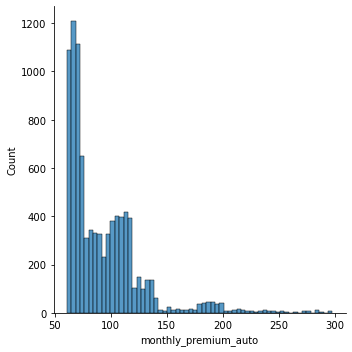

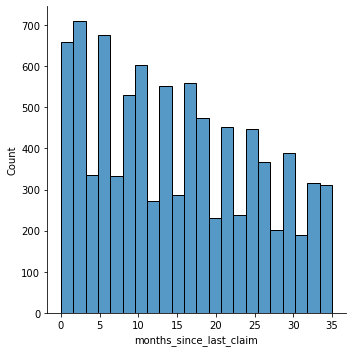

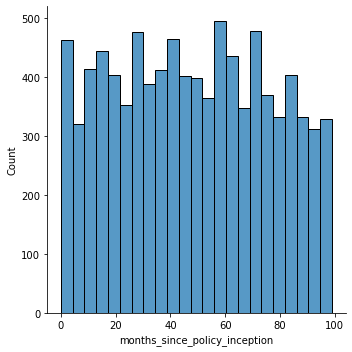

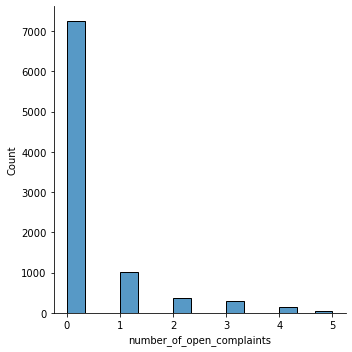

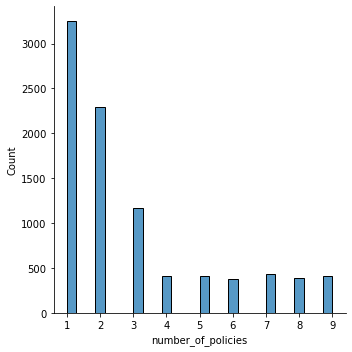

In [21]:
discreet_plot(discreet_df)

The `monthly_premium_auto` column shows a wide range, with what look like a high amount of outliers, with most of the values in [60-140].  
`months_since_last_claim` and `months_since_policy_inception` seem to be more evenly distributed, while the last two are almost as concentrated as the first one, but with less different values.

-- Continous variables:

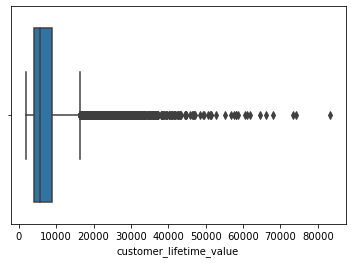

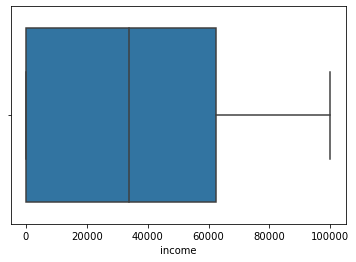

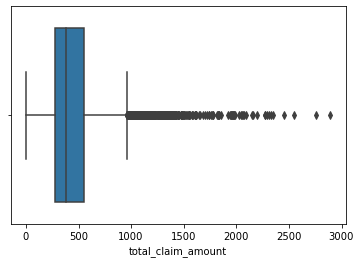

In [22]:
continous_plot(continous_df)


`customer_lifetime_value` and `total_claim_amount` have a big amount of outliers, with a low dispersion of the central values, while `income` has no apparent outliers, and the bulk of its data is more dispersed.

## 10) Continous outliers
Look for outliers in the continuous variables. 

As seen in the question above, only `customer_lifetime_value` and `total_claim_amount` show outliers, and only on the right side (above 75%)

## 11) Outlier management
Did you find outliers? Comment what you will do with them.
First I want to check how many outliers are in each column:

In [23]:
iqr = np.nanpercentile(continous_df['customer_lifetime_value'],75) - np.nanpercentile(continous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

outliers = continous_df[continous_df['customer_lifetime_value'] > upper_limit]
len(outliers)

16414.039911750002


817

For this column, almost 10% of the values fall outside of the 75 percentile. I may give them the `upper_limit` value, if I think they should be kept.

In [24]:
iqr2 = np.nanpercentile(continous_df['total_claim_amount'],75) - np.nanpercentile(continous_df['total_claim_amount'],25)
upper_limit2 = np.nanpercentile(continous_df['total_claim_amount'],75) + 1.5*iqr2
print(upper_limit2)

outliers2 = continous_df[continous_df['total_claim_amount'] > upper_limit2]
len(outliers2)

960.3997301249999


453

On the other hand, with less than 5% of the values being outliers, I would drop these.  
After dropping, I would need to calculate again for the previous column, to see if it needs more work.

## 12) NaN values
Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [25]:
numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

There are no NaN values in this case.

# Lab 2 | Cleaning categorical data
## 1) Libraries
Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv.  

Check the 1st answer of the previous lab (start of the notebook).

## 2) Categorigal data
Find all of the categorical data. Save it in a categorical_df variable.

Done in a previous question:

In [26]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


## 3) NaN values
Check for NaN values.

In [27]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

There are no NaN values (surprisingly).

## 4) Unique values
Check all unique values of columns.

In [28]:
for col in categorical_df:
    print(col)
    print(categorical_df[col].value_counts())
    print( ) 

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
No     7826
Yes    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender
F    4658
M    4476
Name: gender, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status
Ma

The amount of unique values of `customer` are the same as the amount of rows in the table, as it is a unique identifier. As that role is already covered by the index, I don't need that column.

In [29]:
categorical_df = categorical_df.drop('customer', 1)

C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/2411162847.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  categorical_df = categorical_df.drop('customer', 1)


## 5) Checking dtypes
Check dtypes. Do they all make sense as categorical data?

In [30]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

There are several columns that can easily be translated to numerical:  
`response` and `gender` could be treated as boolean with the information in the table.  
`coverage`, `education`, `renew_offer_type` and `vehicle_size` can be label encoded without any transformations.  

In [31]:
categorical_df['response'] = np.where(categorical_df['response'] == 'No', 0, 1)
categorical_df['response'].value_counts()

0    7826
1    1308
Name: response, dtype: int64

In [32]:
categorical_df['gender'] = np.where(categorical_df['gender'] == 'M', 0, 1)
categorical_df['gender'].value_counts()

1    4658
0    4476
Name: gender, dtype: int64

## 6) Alpha &  numeric data
Does any column contain alpha and numeric data? Decide how to clean it.

For `renew_offer_type` we can remove the string 'offer' from the fields and it would work as a numerical column.  


In [33]:
# lstrip('offer')
def offer_removal(x):
    return x.lstrip('Offer')


categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].apply(offer_removal)
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype('int64')
categorical_df['renew_offer_type']

0       1
1       3
2       1
3       1
4       1
       ..
9129    2
9130    1
9131    1
9132    3
9133    4
Name: renew_offer_type, Length: 9134, dtype: int64

## 7) Wrangling categorical data
Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.  

`coverage`, `education`, `renew_offer_type` and `vehicle_size` can be label encoded without any transformations.  

# 8) policy_type and policy
Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

With `policy_type` and `policy`, the information can be transformed into 3 different columns, one for each type, containing the levels of the policies.

In [34]:
def personal_removal(x):
    return x.lstrip('Personal L')
def corporate_removal(x):
    return x.lstrip('Corporate L')
def special_removal(x):
    return x.lstrip('Special L')

In [35]:
categorical_df['policy'] = categorical_df['policy'].apply(personal_removal)
categorical_df['policy'] = categorical_df['policy'].apply(corporate_removal)
categorical_df['policy'] = categorical_df['policy'].apply(special_removal)
categorical_df['policy'].value_counts()

3    4588
2    2881
1    1665
Name: policy, dtype: int64

In [36]:
categorical_df['policy_personal'] = np.where(categorical_df['policy_type'] == 'Personal Auto', categorical_df['policy'], 0).astype('int64')
categorical_df['policy_corporate'] = np.where(categorical_df['policy_type'] == 'Corporate Auto', categorical_df['policy'], 0).astype('int64')
categorical_df['policy_special'] = np.where(categorical_df['policy_type'] == 'Special Auto', categorical_df['policy'], 0).astype('int64')
categorical_df[['policy', 'policy_type', 'policy_personal', 'policy_corporate', 'policy_special']]

,policy,policy_type,policy_personal,policy_corporate,policy_special
0,3,Corporate Auto,0,3,0
1,3,Personal Auto,3,0,0
2,3,Personal Auto,3,0,0
3,2,Corporate Auto,0,2,0
4,1,Personal Auto,1,0,0
...,...,...,...,...,...
9129,1,Personal Auto,1,0,0
9130,3,Corporate Auto,0,3,0
9131,2,Corporate Auto,0,2,0
9132,2,Personal Auto,2,0,0


It is not the more straightforward way to achieving the results, but it is a way. 

## 9) Unique values part 2
Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [37]:
for col in categorical_df:
    print(col)
    print(categorical_df[col].value_counts())
    print( ) 

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
0    7826
1    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender
1    4658
0    4476
Name: gender, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

p

Besides moving the new numerical columns to the appropiate table, I can see nothing else to do in order to ease encoding.

## Extra) Cleaning tables
I need to move the new numerical columns in `categorical_df` to `numerical`.

In [38]:
numerical[['response','gender','renew_offer_type','policy_personal','policy_corporate','policy_special']] = categorical_df[['response','gender','renew_offer_type','policy_personal','policy_corporate','policy_special']]
numerical.head()

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,gender,renew_offer_type,policy_personal,policy_corporate,policy_special
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,1,0,3,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1,3,3,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,1,3,0,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,1,0,2,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,1,1,0,0


In [39]:
categorical_df = categorical_df.drop(['response','gender','renew_offer_type','policy_personal','policy_corporate','policy_special','policy','policy_type'], 1)
categorical_df.head()

C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/3774054331.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  categorical_df = categorical_df.drop(['response','gender','renew_offer_type','policy_personal','policy_corporate','policy_special','policy','policy_type'], 1)


,state,coverage,education,employmentstatus,location_code,marital_status,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,Suburban,Single,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,Suburban,Married,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,Rural,Single,Agent,Four-Door Car,Medsize


# Lab 3 | Feature extraction
## 1) Open the categorical table

In [40]:
categorical_df.head()

,state,coverage,education,employmentstatus,location_code,marital_status,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,Suburban,Single,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,Suburban,Married,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,Rural,Single,Agent,Four-Door Car,Medsize


## 2) Plotting variables
Plot all the categorical variables with the proper plot. What can you see?

In [41]:
def categorical_plot(table):
    for col in table.columns:
        sns.displot(x=col, data=table)
        plt.show()

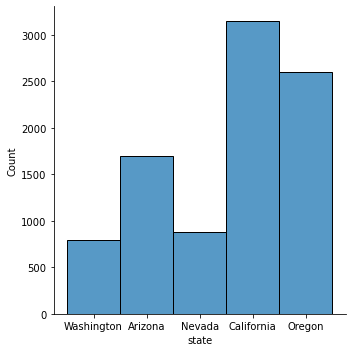

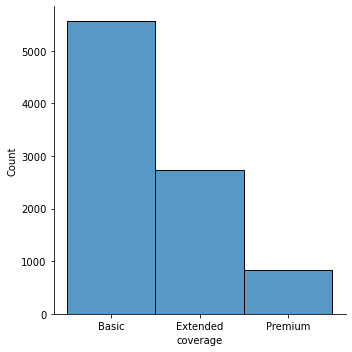

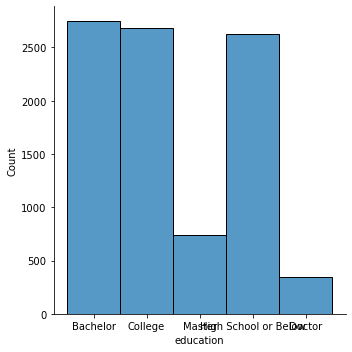

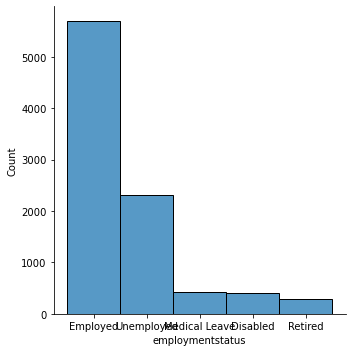

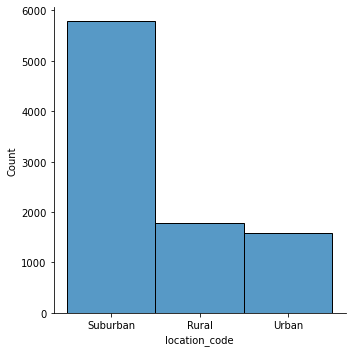

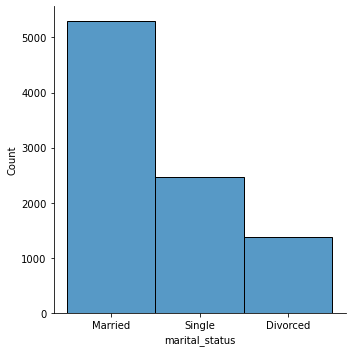

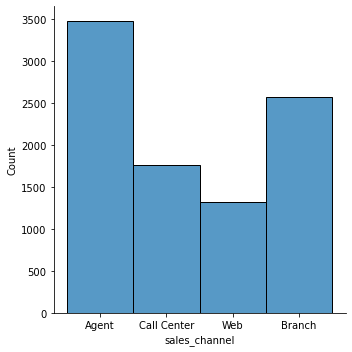

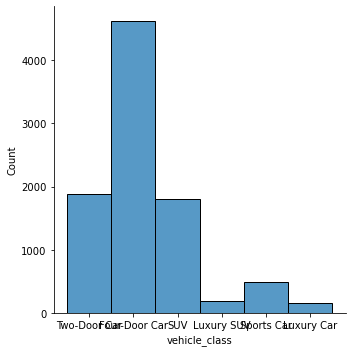

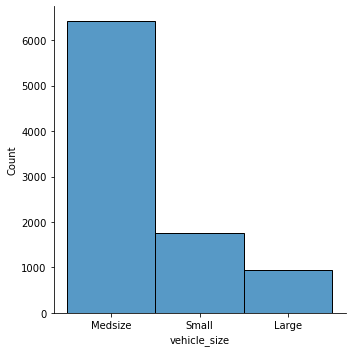

In [42]:
categorical_plot(categorical_df)

I don't know yet what to say about these plots. I'll come back later.

## 3) Redundant columns
There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  

I think I already dealt with them in the previous lab, check questions 5, 6 and 8 in Lab 2.


## 4) Time variable
Plot time variable. Can you extract something from it?

My first conclusion is that a DateTime column is neither of object nor numerical types, as it is not in those tables:

In [43]:
numerical.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
response                           int32
gender                             int32
renew_offer_type                   int64
policy_personal                    int64
policy_corporate                   int64
policy_special                     int64
dtype: object

In [44]:
categorical_df.dtypes

state               object
coverage            object
education           object
employmentstatus    object
location_code       object
marital_status      object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

Luckily I can still access the column:

In [45]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

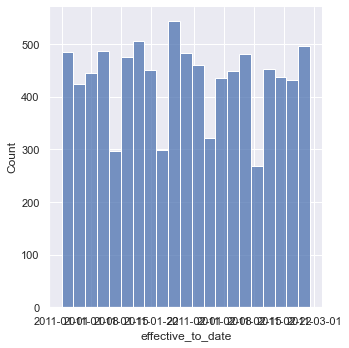

In [46]:
sns.set(rc={'figure.figsize':(50,50)})
sns.displot(x='effective_to_date', data = customer_df)

<AxesSubplot:xlabel='effective_to_date', ylabel='Count'>

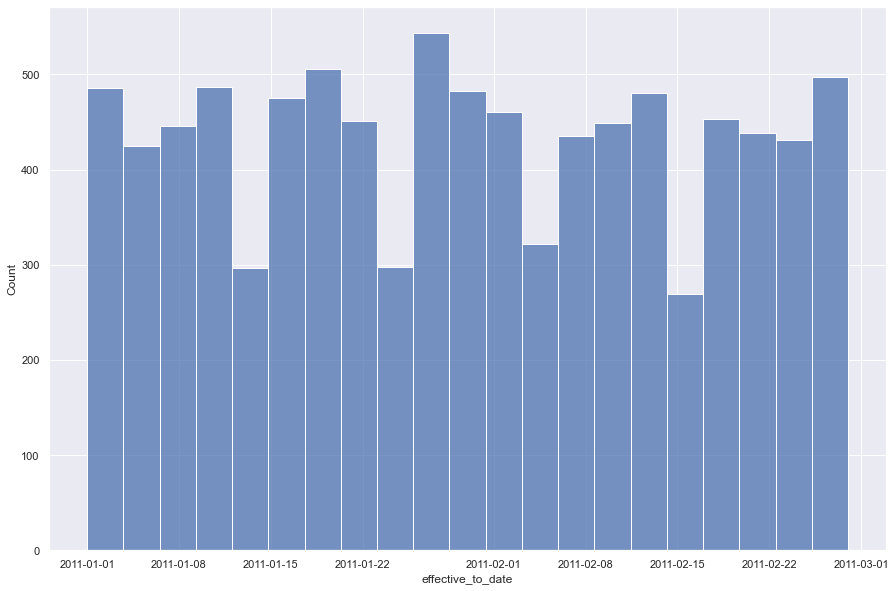

In [47]:
dims=(15, 10)

fig, ax = plt.subplots(figsize=dims)
sns.histplot(x='effective_to_date', data = customer_df, ax=ax)

The only information I can get from this plot is that the distribution of end dates is pretty even during the 3 months we have records of.

# Lab 5 | Comparing regression models
## 1) Libraries
In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 2) Removing outliers
We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

I have already found outliers in three columns: `monthly_premium_auto`, `customer_lifetime_value` and `total_claim_amount` but chose to do nothing about them, time to change my opinion.  
I need to combine all tables again before cleaning outliers so that the index keeps pointing where it should.

In [49]:
data = pd.concat([numerical,categorical_df, customer_df['effective_to_date']], axis=1)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,gender,...,state,coverage,education,employmentstatus,location_code,marital_status,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,...,Washington,Basic,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize,2011-02-24
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1,...,Arizona,Extended,Bachelor,Unemployed,Suburban,Single,Agent,Four-Door Car,Medsize,2011-01-31
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,Nevada,Premium,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize,2011-02-19
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,California,Basic,Bachelor,Unemployed,Suburban,Married,Call Center,SUV,Medsize,2011-01-20
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,Washington,Basic,Bachelor,Employed,Rural,Single,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,0,...,California,Basic,Bachelor,Employed,Urban,Married,Web,Four-Door Car,Medsize,2011-02-10
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,1,...,California,Extended,College,Employed,Suburban,Divorced,Branch,Four-Door Car,Medsize,2011-02-12
9131,8163.890428,0,85,9,37,3,2,790.784983,0,0,...,California,Extended,Bachelor,Unemployed,Suburban,Single,Branch,Four-Door Car,Medsize,2011-02-06
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,0,...,California,Extended,College,Employed,Suburban,Married,Branch,Four-Door Car,Large,2011-02-03


Now I check how many lines do I have to drop.

In [50]:
# Checking how many values will be removed if the outliers are removed
iqr1 = np.nanpercentile(data['monthly_premium_auto'],75) - np.nanpercentile(data['monthly_premium_auto'],25)
upper_limit1 = np.nanpercentile(data['monthly_premium_auto'],75) + 1.5*iqr1
print(upper_limit1)

extraordinary_points = data[data['monthly_premium_auto'] > upper_limit1]
len(extraordinary_points)  # This checks the number of points that will be removed

170.5


430

In [51]:
# Checking how many values will be removed if the outliers are removed
iqr2 = np.nanpercentile(data['customer_lifetime_value'],75) - np.nanpercentile(data['customer_lifetime_value'],25)
upper_limit2 = np.nanpercentile(data['customer_lifetime_value'],75) + 1.5*iqr2
print(upper_limit2)

extraordinary_points = data[data['customer_lifetime_value'] > upper_limit2]
len(extraordinary_points)  # This checks the number of points that will be removed

16414.039911750002


817

In [52]:
# Checking how many values will be removed if the outliers are removed
iqr3 = np.nanpercentile(data['total_claim_amount'],75) - np.nanpercentile(data['total_claim_amount'],25)
upper_limit3 = np.nanpercentile(data['total_claim_amount'],75) + 1.5*iqr3
print(upper_limit3)

extraordinary_points = data[data['total_claim_amount'] > upper_limit3]
len(extraordinary_points)  # This checks the number of points that will be removed

960.3997301249999


453

I now will drop lines where the values of the outliers are bigger than the 75%:

In [53]:
data_clean = data[(data['monthly_premium_auto'] <= upper_limit1)&(data['customer_lifetime_value'] <= upper_limit2)&(data['total_claim_amount'] <= upper_limit3)].copy()
data_clean = data_clean.reset_index(drop=True)
data_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,gender,...,state,coverage,education,employmentstatus,location_code,marital_status,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,...,Washington,Basic,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize,2011-02-24
1,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,Nevada,Premium,Bachelor,Employed,Suburban,Married,Agent,Two-Door Car,Medsize,2011-02-19
2,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,California,Basic,Bachelor,Unemployed,Suburban,Married,Call Center,SUV,Medsize,2011-01-20
3,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,Washington,Basic,Bachelor,Employed,Rural,Single,Agent,Four-Door Car,Medsize,2011-02-03
4,8256.297800,62902,69,14,94,0,2,159.383042,1,1,...,Oregon,Basic,Bachelor,Employed,Rural,Married,Web,Two-Door Car,Medsize,2011-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,4100.398533,47761,104,16,58,0,1,541.282007,0,1,...,California,Premium,College,Employed,Suburban,Single,Branch,Four-Door Car,Large,2011-01-06
7843,3096.511217,21604,79,14,28,0,1,379.200000,1,1,...,California,Extended,College,Employed,Suburban,Divorced,Branch,Four-Door Car,Medsize,2011-02-12
7844,8163.890428,0,85,9,37,3,2,790.784983,0,0,...,California,Extended,Bachelor,Unemployed,Suburban,Single,Branch,Four-Door Car,Medsize,2011-02-06
7845,7524.442436,21941,96,34,3,0,3,691.200000,0,0,...,California,Extended,College,Employed,Suburban,Married,Branch,Four-Door Car,Large,2011-02-03


## 3) Creating a copy
Create a copy of the dataframe for the data wrangling.

I created the copy `data_clean` when dropping the outliers.

## 4) Normalizing
Normalize the continuous variables. You can use any one method you want.

First I need to separate the tables again:

Before normalizing, I need the train/test split done:

In [54]:
X = data_clean.drop(['total_claim_amount'],axis=1)
y = data_clean['total_claim_amount']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

I also need to divide between categorical and numerical:

In [56]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = 'object')

X_train_cat = pd.concat([X_train_cat, X_train['effective_to_date']], axis=1) #This column was left behind due to it not being an object

Now I will use the MinMax scaler to normalize the numerical table:

In [57]:
transformer = MinMaxScaler().fit(X_train_num) #I train the scaler with the training set and keep it apart

In [58]:
display(X_train_num.describe().T)

X_train_num_normalized = transformer.transform(X_train_num)

X_train_num_normalized = pd.DataFrame(X_train_num_normalized, columns=X_train_num.columns)
X_train_num_normalized['index'] = X_train_num.index
X_train_num_normalized = X_train_num_normalized.set_index('index')
X_train_num_normalized

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,4708.0,6075.811189,3134.732658,1898.683686,3571.56136,5316.700549,8012.185085,16388.09542
income,4708.0,38715.693713,30417.600296,0.000000,12394.25000,35317.500000,62980.000000,99961.00000
monthly_premium_auto,4708.0,86.042268,22.103829,61.000000,68.00000,77.000000,104.000000,170.00000
months_since_last_claim,4708.0,14.993203,10.033106,0.000000,6.00000,14.000000,23.000000,35.00000
months_since_policy_inception,4708.0,48.183942,27.890925,0.000000,25.00000,48.000000,71.000000,99.00000
number_of_open_complaints,4708.0,0.389550,0.929598,0.000000,0.00000,0.000000,0.000000,5.00000
number_of_policies,4708.0,2.973662,2.437959,1.000000,1.00000,2.000000,4.000000,9.00000
response,4708.0,0.142948,0.350057,0.000000,0.00000,0.000000,0.000000,1.00000
gender,4708.0,0.504036,0.500037,0.000000,0.00000,1.000000,1.000000,1.00000
renew_offer_type,4708.0,1.988743,1.010294,1.000000,1.00000,2.000000,3.000000,4.00000


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response,gender,renew_offer_type,policy_personal,policy_corporate,policy_special
index,,,,,,,,,,,,,
6043,0.640041,0.145387,0.018349,0.114286,0.202020,0.0,0.125,0.0,0.0,0.000000,1.000000,0.0,0.000000
1599,0.455684,0.980412,0.422018,0.114286,0.464646,0.0,0.750,0.0,0.0,0.666667,1.000000,0.0,0.000000
4496,0.343487,0.000000,0.394495,0.685714,0.494949,0.0,0.625,0.0,0.0,0.000000,0.000000,0.0,0.666667
717,0.337839,0.222587,0.229358,0.285714,0.363636,0.0,0.250,0.0,1.0,0.666667,1.000000,0.0,0.000000
2590,0.159496,0.579556,0.403670,0.285714,0.646465,0.0,0.000,0.0,1.0,0.000000,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.777970,0.215214,0.532110,0.600000,0.818182,0.2,0.125,0.0,0.0,0.333333,1.000000,0.0,0.000000
3927,0.464451,0.000000,0.513761,0.314286,0.636364,0.0,0.500,0.0,1.0,0.333333,0.000000,0.0,0.666667
5955,0.299666,0.000000,0.238532,0.885714,0.090909,0.0,1.000,0.0,1.0,0.000000,1.000000,0.0,0.000000


I can now normalize also in the test set:

In [59]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = 'object')
X_test_cat = pd.concat([X_test_cat, X_test['effective_to_date']], axis=1)

X_test_num_normalized = transformer.transform(X_test_num)

X_test_num_normalized = pd.DataFrame(X_test_num_normalized, columns=X_train_num.columns)
X_test_num_normalized['index'] = X_test_num.index
X_test_num_normalized = X_test_num_normalized.set_index('index')
X_test_num_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response,gender,renew_offer_type,policy_personal,policy_corporate,policy_special
index,,,,,,,,,,,,,
7394,0.240922,0.664549,0.688073,1.000000,0.939394,0.0,0.000,1.0,0.0,0.333333,0.000000,1.0,0.000000
6729,0.203989,0.442963,0.000000,0.914286,0.070707,0.0,0.250,0.0,0.0,0.333333,0.333333,0.0,0.000000
3263,0.037836,0.291634,0.055046,0.685714,0.727273,0.0,0.000,0.0,0.0,1.000000,1.000000,0.0,0.000000
4456,0.912095,0.285241,0.357798,0.114286,0.222222,0.2,0.125,1.0,1.0,0.333333,0.333333,0.0,0.000000
3471,0.443977,0.000000,0.532110,0.085714,0.545455,0.0,0.250,0.0,1.0,0.333333,1.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,0.248456,0.332039,0.082569,0.257143,0.808081,0.0,1.000,0.0,0.0,0.666667,0.333333,0.0,0.000000
2332,0.265231,0.866748,0.091743,0.485714,0.797980,0.0,0.625,0.0,1.0,1.000000,1.000000,0.0,0.000000
1553,0.261145,0.369524,0.082569,0.914286,0.313131,0.0,0.250,0.0,1.0,0.000000,0.000000,0.0,0.666667


## 5) Encoding
Encode the categorical variables

In [60]:
X_train_cat

,state,coverage,education,employmentstatus,location_code,marital_status,sales_channel,vehicle_class,vehicle_size,effective_to_date
6043,California,Basic,High School or Below,Disabled,Suburban,Single,Branch,Four-Door Car,Medsize,2011-01-19
1599,Arizona,Basic,Bachelor,Employed,Urban,Divorced,Call Center,SUV,Small,2011-02-08
4496,Oregon,Basic,College,Unemployed,Suburban,Single,Branch,SUV,Medsize,2011-02-27
717,Nevada,Extended,High School or Below,Employed,Suburban,Married,Web,Two-Door Car,Medsize,2011-01-29
2590,Arizona,Basic,Bachelor,Employed,Suburban,Married,Call Center,SUV,Small,2011-02-24
...,...,...,...,...,...,...,...,...,...,...
79,Oregon,Premium,College,Medical Leave,Suburban,Married,Branch,Two-Door Car,Small,2011-01-27
3927,Oregon,Basic,High School or Below,Unemployed,Suburban,Single,Branch,SUV,Medsize,2011-01-13
5955,Oregon,Extended,Bachelor,Unemployed,Suburban,Single,Branch,Four-Door Car,Medsize,2011-02-23
6936,Oregon,Basic,Bachelor,Disabled,Suburban,Married,Call Center,Two-Door Car,Small,2011-01-01


I want to separate the columns by the encoding method:

In [61]:
OH_train = X_train_cat[['state', 'marital_status', 'sales_channel', 'vehicle_class']]
ordinal_train = X_train_cat[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]
date_train = pd.DataFrame(X_train_cat['effective_to_date'])

In [62]:
OH_test = X_test_cat[['state', 'marital_status', 'sales_channel', 'vehicle_class']]
ordinal_test = X_test_cat[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]
date_test = pd.DataFrame(X_test_cat['effective_to_date'])

### Onehot encoding
As usual, create the encoder with the train set, reuse with the test set.

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(OH_train)

In [64]:
encoded_for_p = encoder.transform(OH_train).toarray()

cols = [colname for row in encoder.categories_ for colname in row]

onehot_table = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

OH_train_encoded = onehot_table.drop(cols_to_drop,axis=1)
OH_train_encoded['index'] = OH_train.index
OH_train_encoded = OH_train_encoded.set_index('index')

In [65]:
OH_train_encoded

,California,Nevada,Oregon,Washington,Married,Single,Branch,Call Center,Web,SUV,Sports Car,Two-Door Car
index,,,,,,,,,,,,
6043,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4496,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
717,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3927,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5955,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
encoded_for_p = encoder.transform(OH_test).toarray()

cols = [colname for row in encoder.categories_ for colname in row]

onehot_table = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

OH_test_encoded = onehot_table.drop(cols_to_drop,axis=1)
OH_test_encoded['index'] = OH_test.index
OH_test_encoded = OH_test_encoded.set_index('index')

In [67]:
OH_test_encoded

,California,Nevada,Oregon,Washington,Married,Single,Branch,Call Center,Web,SUV,Sports Car,Two-Door Car
index,,,,,,,,,,,,
7394,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6729,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3471,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7002,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2332,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1553,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ordinal encoding

In [68]:
for col in ordinal_train:
    print(col)
    print(ordinal_train[col].value_counts())
    print( ) 

coverage
Basic       2982
Extended    1387
Premium      339
Name: coverage, dtype: int64

education
Bachelor                1421
College                 1395
High School or Below    1335
Master                   373
Doctor                   184
Name: education, dtype: int64

employmentstatus
Employed         3005
Unemployed       1125
Medical Leave     220
Disabled          209
Retired           149
Name: employmentstatus, dtype: int64

location_code
Suburban    2904
Rural        947
Urban        857
Name: location_code, dtype: int64

vehicle_size
Medsize    3317
Small       871
Large       520
Name: vehicle_size, dtype: int64



In [69]:
ordinal_train["coverage"] = ordinal_train["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
ordinal_train["education"] = ordinal_train["education"].map({"High School or Below" : 0, "Bachelor" : 0.25, "College" : 0.5, "Master":0.75, "Doctor":1})
ordinal_train["employmentstatus"] = ordinal_train["employmentstatus"].map({"Unemployed" : 0, "Disabled" : 0.25, "Medical Leave" : 0.5, "Retired":0.75, "Employed":1})
ordinal_train["location_code"] = ordinal_train["location_code"].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
ordinal_train["vehicle_size"] = ordinal_train["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})

C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/2988425443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_train["coverage"] = ordinal_train["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/2988425443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_train["education"] = ordinal_train["education"].map({"High School or Below" : 0, "Bachelor" : 0.25, "College" : 0.5, "Master":0.75, "Doctor":1})
C:\Users\carlo\AppData\Local\

In [70]:
ordinal_train

,coverage,education,employmentstatus,location_code,vehicle_size
6043,0.0,0.00,0.25,0.5,0.5
1599,0.0,0.25,1.00,1.0,0.0
4496,0.0,0.50,0.00,0.5,0.5
717,0.5,0.00,1.00,0.5,0.5
2590,0.0,0.25,1.00,0.5,0.0
...,...,...,...,...,...
79,1.0,0.50,0.50,0.5,0.0
3927,0.0,0.00,0.00,0.5,0.5
5955,0.5,0.25,0.00,0.5,0.5
6936,0.0,0.25,0.25,0.5,0.0


In [71]:
ordinal_test["coverage"] = ordinal_test["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
ordinal_test["education"] = ordinal_test["education"].map({"High School or Below" : 0, "Bachelor" : 0.25, "College" : 0.5, "Master":0.75, "Doctor":1})
ordinal_test["employmentstatus"] = ordinal_test["employmentstatus"].map({"Unemployed" : 0, "Disabled" : 0.25, "Medical Leave" : 0.5, "Retired":0.75, "Employed":1})
ordinal_test["location_code"] = ordinal_test["location_code"].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
ordinal_test["vehicle_size"] = ordinal_test["vehicle_size"].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})


C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/1474370959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_test["coverage"] = ordinal_test["coverage"].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\carlo\AppData\Local\Temp/ipykernel_9200/1474370959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_test["education"] = ordinal_test["education"].map({"High School or Below" : 0, "Bachelor" : 0.25, "College" : 0.5, "Master":0.75, "Doctor":1})
C:\Users\carlo\AppData\Local\Temp

In [72]:
ordinal_test

,coverage,education,employmentstatus,location_code,vehicle_size
7394,0.5,0.50,1.00,0.0,0.5
6729,0.0,0.00,1.00,0.5,0.0
3263,0.0,0.25,0.50,1.0,0.5
4456,0.0,0.00,0.50,0.5,0.5
3471,0.0,0.25,0.00,0.5,0.5
...,...,...,...,...,...
7002,0.0,0.25,1.00,0.5,0.5
2332,0.0,0.50,1.00,0.0,0.0
1553,0.0,1.00,1.00,1.0,0.5
2520,0.0,0.50,1.00,0.0,0.5


## 6) Dates
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [73]:
date_train

,effective_to_date
6043,2011-01-19
1599,2011-02-08
4496,2011-02-27
717,2011-01-29
2590,2011-02-24
...,...
79,2011-01-27
3927,2011-01-13
5955,2011-02-23
6936,2011-01-01


In [74]:
def date_encoding(table):
    #The input table needs to have a column 'effective_to_date'
    table['month'] = table['effective_to_date'].dt.month
    table['weekday'] = table['effective_to_date'].dt.day
    table = table.drop('effective_to_date',axis=1)

    return table

date_train = date_encoding(date_train)
date_test = date_encoding(date_test)
date_train

,month,weekday
6043,1,19
1599,2,8
4496,2,27
717,1,29
2590,2,24
...,...,...
79,1,27
3927,1,13
5955,2,23
6936,1,1


## 7) All numerical
The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [75]:
OH_test_encoded.dtypes

California      float64
Nevada          float64
Oregon          float64
Washington      float64
Married         float64
Single          float64
Branch          float64
Call Center     float64
Web             float64
SUV             float64
Sports Car      float64
Two-Door Car    float64
dtype: object

In [76]:
ordinal_train.dtypes

coverage            float64
education           float64
employmentstatus    float64
location_code       float64
vehicle_size        float64
dtype: object

In [77]:
date_train.dtypes

month      int64
weekday    int64
dtype: object

In [78]:
X_train_num_normalized.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
number_of_open_complaints        float64
number_of_policies               float64
response                         float64
gender                           float64
renew_offer_type                 float64
policy_personal                  float64
policy_corporate                 float64
policy_special                   float64
dtype: object

All columns are numerical

## 8) Modeling
Try a simple linear regression with all the data to see whether we are getting good results.
It's time to join all the tables:

In [79]:
X_train_final = pd.concat([X_train_num_normalized, date_train, ordinal_train, OH_train_encoded], axis=1)
X_train_final.shape

(4708, 32)

In [80]:
X_train_final.index

Int64Index([6043, 1599, 4496,  717, 2590, 4574, 3332,  125, 6518, 6566,
            ...
            4149, 1890, 6068,  350, 6026,   79, 3927, 5955, 6936, 5640],
           dtype='int64', length=4708)

In [81]:
X_test_final = pd.concat([X_test_num_normalized, date_test, ordinal_test, OH_test_encoded], axis=1)
X_test_final.index

Int64Index([7394, 6729, 3263, 4456, 3471,  871,   74, 7114, 7553, 3805,
            ...
             584, 2801,  944, 4899, 2056, 7002, 2332, 1553, 2520, 5370],
           dtype='int64', length=3139)

I can finally create the model:

In [82]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import math


In [83]:
lm = linear_model.LinearRegression()
lm.fit(X_train_final,y_train)


LinearRegression()

In [84]:
def metrics(X, y):
    #Finds and prints the metrics of the algorithm
    predictions = lm.predict(X)
    r2 = r2_score(y, predictions)
    print('R2:', r2)
    mse = np.sqrt(mean_squared_error(y,predictions))
    print('MSE:', mse)
    rmse = math.sqrt(mse)
    print('RMSE:', rmse)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)

In [85]:
metrics(X_test_final,y_test)

R2: 0.5192246101367934
MSE: 140.8425130619764
RMSE: 11.867708837933984
MAE: 110.70927981801869


## 9) Multi modeling
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [86]:
def multimodeling(X_train, X_test, y_train, y_test, lm=True, KNN=True, k=3):
    if lm:
        print('Linear Regression:')
        lm = linear_model.LinearRegression()
        lm.fit(X_train,y_train)


        predictions = lm.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print('Score:', r2)
    
#     print('Logistic Regression:')
#     LR = LogisticRegression(random_state=0, solver='lbfgs')
#     LR.fit(X_train, y_train)
    
#     score = LR.score(X_test_scaled, y_test)
#     print('Score:', score)    
# Apparently I don't need Logistic Regression

    if KNN:
        print('KNN:')
        KNN = KNeighborsRegressor(n_neighbors=k)
        KNN.fit(X_train, y_train)

        score = KNN.score(X_test, y_test)
        print('Score:', score, 'with k:', k)
    
    

## 10) Testing
Use the function to check LinearRegressor and KNeighborsRegressor.

In [87]:
multimodeling(X_train_final, X_test_final, y_train, y_test, k=20)

Linear Regression:
Score: 0.5192246101367934
KNN:
Score: 0.3393845843939999 with k: 20


## 11) MLPRegressor
You can check also the MLPRegressor for this task!

In [98]:
from sklearn.neural_network import MLPRegressor

In [109]:
def multimodeling2(X_train, X_test, y_train, y_test, lm=True, KNN=True, k=3, MLP=True, iter=300):
    if lm:
        print('Linear Regression:')
        lm = linear_model.LinearRegression()
        lm.fit(X_train,y_train)


        predictions = lm.predict(X_test)
        r2 = r2_score(y_test, predictions)
        print('Score:', r2)
    

    if KNN:
        print('KNN:')
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        score = knn.score(X_test, y_test)
        print('Score:', score, 'with k:', k)
        
    if MLP:
        print('MLP:')
        #There are more options, but I chose these according to https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/
        mlp = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam', random_state=42)
        mlp.fit(X_train, y_train)
        score = mlp.score(X_test, y_test)
        print(('Score:', score, 'in:', iter, 'iterations'))

In [110]:
multimodeling2(X_train_final, X_test_final, y_train, y_test, k=5, iter=1400)

Linear Regression:
Score: 0.5192246101367934
KNN:
Score: 0.34832754774836583 with k: 5
MLP:
('Score:', 0.8150648812726344, 'in:', 1400, 'iterations')


C:\Users\carlo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


## 12) Conclussions
Check and discuss the results.

With the preprocessing I have done to de data (and the state of the dataset itself), KNN is not capable of having a good score, stabilizing at 0.35.  
The linear regression fares a bit better at 0.52, but it can still be improved.  
For MLP the results are a bit more difficult to review, as it needs a high number of iterations to even converge, it may even show some overfitting.

# Lab 6 | Random variable distributions
## 1) Numerical values
Get the numerical variables from our dataset.

In [111]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,gender,renew_offer_type,policy_personal,policy_corporate,policy_special
0,2763.519279,56274,69,32,5,0,1,384.811147,0,1,1,0,3,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,1,3,3,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,1,3,0,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,1,0,2,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,0,2,1,0,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,1,1,0,3,0
9131,8163.890428,0,85,9,37,3,2,790.784983,0,0,1,0,2,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,0,3,2,0,0
